In [5]:
%matplotlib inline

In [30]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Breast Cancer

### 가정
1) 조건부 독립 - Naive 하게 가정한다. 

2) IID - 중요하다.

In [38]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=31)

lr = LogisticRegression()
nb = GaussianNB()

lr_scores = []
nb_scores = []

train_sizes = range(10, len(X_train), 25)

# fit
for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, 
                                              y_train,
                                              train_size=train_size, 
                                              stratify=y_train,
                                              random_state=31)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))

/Users/sailyourlife/anaconda3/envs/scikit-learn/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


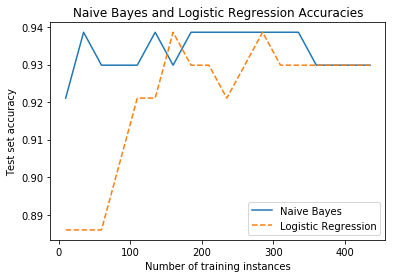

In [39]:
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("Naive Bayes and Logistic Regression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()

- 훈련 데이터의 개수가 좋을 때는 Naive Bayes의 결과가 좋다.

# 2. Indian Diabetes

In [44]:
df = pd.read_csv('./pima-indians-diabetes.csv', header=None)
y = df[8]
X = df[[0,1,2,3,4,5,6,7]]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

In [46]:
lr = LogisticRegression()
nb = GaussianNB()
lr_scores = []
nb_scores = []

In [47]:
train_sizes = range(10, len(X_train), 10)

In [48]:
for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, y_train, train_size=train_size,
                                              stratify=y_train, random_state=11)
    
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))

/Users/sailyourlife/anaconda3/envs/scikit-learn/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


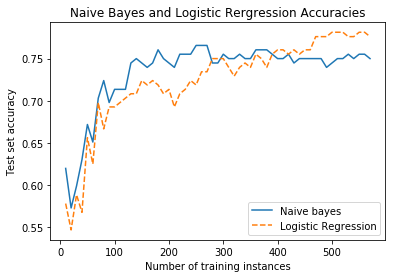

In [50]:
plt.plot(train_sizes, nb_scores, label='Naive bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("Naive Bayes and Logistic Rergression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()

- 훈련 개수가 적어질수록 Logistic Regression이 좋다.

In [52]:
print(len(X_test), len(y_test))

192 192
